# base

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
import joblib
import pickle
from sklearn.ensemble import VotingClassifier

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\BOOKOSB.TTF',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\ERASBD.TTF',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\DUBAI-BOLD.TTF',
 'C:\\Windows\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\GOUDOS.TTF',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\HMKMMAG.TTF',
 'C:\\Windows\\Fonts\\LTYPEBO.TTF',
 'C:\\Windows\\Fonts\\LSANSD.TTF',
 'C:\\Windows\\Fonts\\HMFMOLD.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\seguiemj.ttf',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\phagspab.ttf',
 'C:\\Windows\\Fonts\\PERI____.TTF',
 'C:\\Windows\\Fonts\\courbi.ttf',
 'C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\AGENCYB.TTF',
 'C:\\Windows\\Fonts\\JUICE___.TTF',
 'C:\\Windows\\Fonts\\INFROMAN.TTF',
 'C:\\Windows\\Fonts\\symbol.ttf',
 'C:\\Windows\\Fonts\\trebucbi.ttf',
 'C:\\Windows\\Fonts\\FRAHVIT.TTF',
 'C:\\Windows\\Fonts\\l_1064

In [ ]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
kfold = KFold( n_splits = 5, random_state=1234, shuffle=True)

# 전처리 3분류 오버 샘플링

In [ ]:
# csv 불러오기
path = "C:/Users/NT551XCJ/Desktop/MLproject/영화csv/전처리 최종 4_10명.csv"
ml_df = pd.read_csv(path, encoding = 'cp949')

In [ ]:
# 언더 샘플링의 경우 언더 샘플링 코드를 먼저 실행하고 스플릿
# 오버 샘플링의 경우 스플릿을 먼저 한 후 오버 샘플링 코드 실행

# 언더 샘플링
# ml_df = ml_df[ml_df['sales'] > 500000000].copy()

## 3분류
def label_sales(num):
    if num >= 10000000000:
        return 0
    elif num >= 3000000000:
        return 1
    else:
        return 2


## 2분류
# def label_sales(num):
#     if num >= 3000000000:
#         return 0
#     else:
#         return 1

# 분류 라벨링
ml_df['sales_N'] = ml_df['sales'].apply(label_sales)
ml_df = ml_df.replace(999, -999)

# 필요없는 컬럼 삭제
columns_to_delete = [
    'Smile_Confidence_',
    'Eyeglasses_Confidence_',
    'Sunglasses_Confidence_',
    'Gender_Confidence_',
    'Beard_Confidence_',
    'Mustache_Confidence_',
    'EyesOpen_Confidence_',
    'MouthOpen_Confidence_',
    'FaceOccluded_Confidence_',
    'EyeDirection_Confidence_',
    'Landmarks_'
]

columns_to_delete = [col for col in ml_df.columns if any(substring in col for substring in columns_to_delete)]

ml_df.drop(columns=columns_to_delete, inplace=True)

# 쓸모 없는 컬럼 and 답지 컬럼 삭제
df = ml_df.copy()
df.drop(columns = ['Movie_name', 'Image_name', 'Movie_type', 'Number_of_moviegoers', 'sales','Genre', 'Genre_n', 'sales_N'], inplace = True)

# 답지
y = ml_df.loc[:,'sales_N']

# 훈련 데이터, 평가 데이터, 훈련 데이터 정답, 평가 데이터 정답
X_train, X_val, y_train, y_val = train_test_split(
    df,
    y,
    test_size = 0.2,
    random_state= 1999
)

In [ ]:
# 분류 개수 확인
ml_df.groupby('sales_N').count()

,Movie_name,Image_name,Movie_type,SpecIal,Month,Number_of_moviegoers,sales,Genre,Genre_comedy,Genre_drama,...,part_3,part_4,part_5,part_6,part_7,part_8,part_9,part_10,part_11,part_12
sales_N,,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
1,509,509,509,509,509,509,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
2,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,...,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743


In [ ]:
# 답지 분류 개수 확인
print(y_train.value_counts())

sales_N
2    2186
0     408
1     407
Name: count, dtype: int64


In [ ]:
# 스플릿 잘 되었는지 확인
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((3001, 267), (3001,), (751, 267), (751,))

# 오버 샘플링 코드
학습 데이터 평가 데이터 분류 후 실행하기

In [ ]:
# 오버 샘플링

from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 학습 데이터 오버샘플링
X_train, y_train = smote.fit_resample(X_train, y_train)

# 오버샘플링 후 클래스 분포 확인
print("Class distribution after SMOTE:")
print(y_train.value_counts())

Class distribution after SMOTE:
sales_N
2    2186
1    2186
0    2186
Name: count, dtype: int64


In [ ]:
# 오버 샘플링 잘 되었는지 확인
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((6558, 267), (6558,), (751, 267), (751,))

# LGBM 모델 돌리기

In [ ]:
def lgbc_objective( trail ) :
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate":trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth":trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "min_split_gain":trail.suggest_float("min_split_gain", 0.001, 30),
        "subsample":trail.suggest_float("subsample", 0.1,0.9),
        "colsample_bytre":trail.suggest_float("colsample_bytre", 0.1,0.9),
                'reg_alpha': trail.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trail.suggest_uniform('reg_lambda', 0.0, 10.0)
    }

    lgbc = LGBMClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( lgbc,
                         X_train, y_train,
                          cv = kfold, scoring='accuracy')

    acc_mean = scores.mean()

    return acc_mean

In [ ]:
lgbc_study = optuna.create_study(direction="maximize")
lgbc_study.optimize(lgbc_objective, n_trials=70, n_jobs=-1 )

[I 2024-05-21 09:09:35,986] A new study created in memory with name: no-name-2942c80d-2ac2-4c42-a8d9-31744931c20b
[I 2024-05-21 09:09:44,163] Trial 1 finished with value: 0.6742911759781214 and parameters: {'n_estimators': 35, 'learning_rate': 0.5733912552657877, 'max_depth': 16, 'min_split_gain': 21.00644580766306, 'subsample': 0.8526281955593608, 'colsample_bytre': 0.8604617865938733, 'reg_alpha': 0.1791102317748986, 'reg_lambda': 6.215558073951552}. Best is trial 1 with value: 0.6742911759781214.
[I 2024-05-21 09:10:05,158] Trial 5 finished with value: 0.6906037794645681 and parameters: {'n_estimators': 263, 'learning_rate': 0.8883821821017174, 'max_depth': 1, 'min_split_gain': 12.845526238342053, 'subsample': 0.35235962443152236, 'colsample_bytre': 0.31609933519031347, 'reg_alpha': 0.9105115020837529, 'reg_lambda': 5.773140513184105}. Best is trial 5 with value: 0.6906037794645681.
[I 2024-05-21 09:10:12,818] Trial 4 finished with value: 0.7648687931387324 and parameters: {'n_estim

In [ ]:
print(lgbc_study.best_trial.values)
print(lgbc_study.best_params)

[0.8949391639225317]
{'n_estimators': 789, 'learning_rate': 0.1812164449837142, 'max_depth': 63, 'min_split_gain': 0.002071976195393732, 'subsample': 0.4513078639074128, 'colsample_bytre': 0.8919387637203527, 'reg_alpha': 0.9858868412602229, 'reg_lambda': 4.44590931994689}


In [ ]:
opt_lgbc = LGBMClassifier( n_jobs=-1,
                                random_state=1234,
                                 **lgbc_study.best_params)

opt_lgbc.fit(X_train, y_train)
y_pred = opt_lgbc.predict(X_val)

[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54067
[LightGBM] [Info] Number of data points in the train set: 6558, number of used features: 265
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [ ]:
lgbc_accuracy = accuracy_score(y_val, y_pred)
lgbc_precision = precision_score(y_val, y_pred, average='weighted')
lgbc_recall = recall_score(y_val, y_pred, average='weighted')
lgbc_f1 = f1_score(y_val, y_pred, average='weighted')
lgbc_classification = classification_report(y_val, y_pred)

In [ ]:
lgbc_accuracy

0.7390146471371505

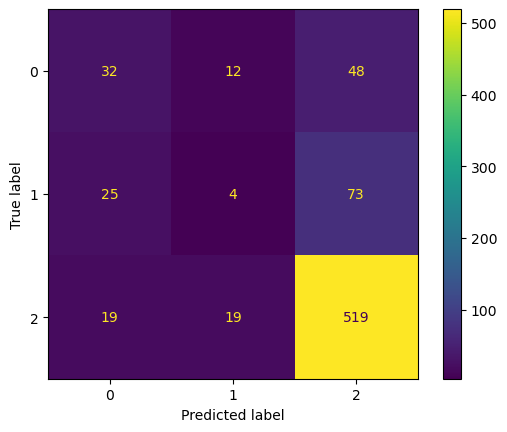

In [ ]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_val, y_pred),
                      display_labels=opt_lgbc.classes_).plot()

In [ ]:
opt_lgbc.feature_importances_
d = pd.DataFrame( data = opt_lgbc.feature_importances_)
d["col_name"] = df.columns
d.sort_values(by =0, ascending=False).iloc[:30]

,0,col_name
31,843,Color5
29,838,Color4
25,810,Color2
254,773,title_rate
27,709,Color3
26,690,Color2_ratio
253,689,text_rate
32,555,Color5_ratio
30,551,Color4_ratio
28,531,Color3_ratio


# XGboost

In [ ]:
# 옵튜나 값 설정
def xgbc_objective( trail ) :
    paramas = {
        "n_estimators": trail.suggest_int("n_estimators", 10, 1000),
        "learning_rate": trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth": trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "subsample": trail.suggest_float("subsample", 0.1, 0.9),
    }

    xgbc = XGBClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( xgbc,
                         X_train, y_train,
                          cv = kfold, scoring="accuracy")

    acc_mean = scores.mean()

    return acc_mean

In [ ]:
# 학습 하기
xgbc_study = optuna.create_study(direction="maximize")
xgbc_study.optimize(xgbc_objective, n_trials=30)

In [ ]:
# 베스트 파람과 발류 보기
print(xgbc_study.best_trial.values)
print(xgbc_study.best_params)

In [ ]:
# 최적의 값으로 학습
opt_xgbc = XGBClassifier( n_jobs=-1,
                                random_state=1999,
                                 **xgbc_study.best_params)

opt_xgbc.fit(X_train, y_train)
y_pred = opt_xgbc.predict(X_val)

In [ ]:
# 학습 결과 저장 나중에 데이터 프레임으로 저장
xgbc_accuracy = accuracy_score(y_val, y_pred)
xgbc_precision = precision_score(y_val, y_pred, average='weighted')
xgbc_recall = recall_score(y_val, y_pred, average='weighted')
xgbc_f1 = f1_score(y_val, y_pred, average='weighted')
xgbc_classification = classification_report(y_val, y_pred)

In [ ]:
# 중요 피쳐 보기
opt_xgbc.feature_importances_
d = pd.DataFrame( data = opt_xgbc.feature_importances_)
d["col_name"] = df.columns
d.sort_values(by =0, ascending=False).iloc[:30]

# Catboost

In [ ]:
cat_model = CatBoostClassifier(random_state=42,iterations=500, learning_rate= 0.01)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_val)

0:	learn: 1.0964169	total: 214ms	remaining: 1m 46s
1:	learn: 1.0943820	total: 270ms	remaining: 1m 7s
2:	learn: 1.0926265	total: 326ms	remaining: 54s
3:	learn: 1.0903154	total: 383ms	remaining: 47.5s
4:	learn: 1.0883769	total: 446ms	remaining: 44.1s
5:	learn: 1.0870112	total: 507ms	remaining: 41.7s
6:	learn: 1.0855463	total: 562ms	remaining: 39.6s
7:	learn: 1.0834742	total: 618ms	remaining: 38s
8:	learn: 1.0814138	total: 675ms	remaining: 36.8s
9:	learn: 1.0792869	total: 736ms	remaining: 36.1s
10:	learn: 1.0776210	total: 795ms	remaining: 35.3s
11:	learn: 1.0758893	total: 850ms	remaining: 34.6s
12:	learn: 1.0740484	total: 912ms	remaining: 34.2s
13:	learn: 1.0723284	total: 973ms	remaining: 33.8s
14:	learn: 1.0710283	total: 1.03s	remaining: 33.4s
15:	learn: 1.0693976	total: 1.09s	remaining: 33.1s
16:	learn: 1.0682163	total: 1.16s	remaining: 32.9s
17:	learn: 1.0669563	total: 1.22s	remaining: 32.7s
18:	learn: 1.0656626	total: 1.28s	remaining: 32.4s
19:	learn: 1.0639139	total: 1.34s	remaining:

In [ ]:
# 학습 결과 저장 나중에 데이터 프레임으로 저장
cat_accuracy = accuracy_score(y_val, y_pred)
cat_precision = precision_score(y_val, y_pred, average='weighted')
cat_recall = recall_score(y_val, y_pred, average='weighted')
cat_f1 = f1_score(y_val, y_pred, average='weighted')
cat_classification = classification_report(y_val, y_pred)

# voting
하드 보팅, 소프트 보팅

In [ ]:
hard_clf = VotingClassifier(
    estimators = [("opt_XGB", opt_xgbc),
                   ("opt_LGBM",opt_lgbc),
                   ('Catboost',cat_model)],

    voting= "hard",
    n_jobs = -1
)
hard_clf.fit(X_train, y_train)
y_pred = hard_clf.predict(X_val)

# 학습 결과 저장 나중에 데이터 프레임으로 저장
hard_clf_accuracy = accuracy_score(y_val, y_pred)
hard_clf_precision = precision_score(y_val, y_pred, average='weighted')
hard_clf_recall = recall_score(y_val, y_pred, average='weighted')
hard_clf_f1 = f1_score(y_val, y_pred, average='weighted')
hard_clf_classification = classification_report(y_val, y_pred)

In [ ]:
soft_clf = VotingClassifier(
    estimators = [("opt_XGB", opt_xgbc),
                   ("opt_LGBM",opt_lgbc),
                   ('Catboost',cat_model)],
    voting= "soft",
    n_jobs = -1
)
soft_clf.fit(X_train, y_train)
y_pred = soft_clf.predict(X_val)

# 학습 결과 저장 나중에 데이터 프레임으로 저장
soft_clf_accuracy = accuracy_score(y_val, y_pred)
soft_clf_precision = precision_score(y_val, y_pred, average='weighted')
soft_clf_recall = recall_score(y_val, y_pred, average='weighted')
soft_clf_f1 = f1_score(y_val, y_pred, average='weighted')
soft_clf_classification = classification_report(y_val, y_pred)

# 데이터 프레임 저장
위에서 저장한 평가 변수들을 모아 한번에 데이터 프레임으로 저장

In [ ]:
team_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

In [ ]:
team_metrics['Model'].append('LightGBM')
team_metrics['Accuracy'].append(lgbc_accuracy)
team_metrics['Precision'].append(lgbc_precision)
team_metrics['Recall'].append(lgbc_recall)
team_metrics['F1-score'].append(lgbc_f1)

team_metrics['Model'].append('XGBoost')
team_metrics['Accuracy'].append(xgbc_accuracy)
team_metrics['Precision'].append(xgbc_precision)
team_metrics['Recall'].append(xgbc_recall)
team_metrics['F1-score'].append(xgbc_f1)

team_metrics['Model'].append('CatBoost')
team_metrics['Accuracy'].append(cat_accuracy)
team_metrics['Precision'].append(cat_precision)
team_metrics['Recall'].append(cat_recall)
team_metrics['F1-score'].append(cat_f1)

team_metrics['Model'].append('Hard-Voting')
team_metrics['Accuracy'].append(hard_clf_accuracy)
team_metrics['Precision'].append(hard_clf_precision)
team_metrics['Recall'].append(hard_clf_recall)
team_metrics['F1-score'].append(hard_clf_f1)

team_metrics['Model'].append('Soft-Voting')
team_metrics['Accuracy'].append(soft_clf_accuracy)
team_metrics['Precision'].append(soft_clf_precision)
team_metrics['Recall'].append(soft_clf_recall)
team_metrics['F1-score'].append(soft_clf_f1)

team_metrics_df = pd.DataFrame(team_metrics)
team_metrics_df.to_csv('3분류_오버_accuracy.csv', index = False, encoding = 'cp949')

# 모델 저장 및 불러오기
저장된 모델들 불러와서 보팅하기

In [ ]:
# 각 모델 pkl로 저장하기
joblib.dump(opt_lgbc, "3분류_오버_opt_lgbc.pkl" )
joblib.dump(opt_xgbc, "3분류_오버_opt_xgbc.pkl" )
joblib.dump(cat_model, "3분류_오버_cat_model.pkl" )
joblib.dump(hard_clf, "3분류_오버_hard_clf.pkl" )
joblib.dump(soft_clf, "3분류_오버_soft_clf.pkl" )

['3분류_오버_cat_model.pkl']

In [ ]:
# 불러오기
model_path ='C:/Users/NT551XCJ/Desktop/MLproject/pkl/3분류_오버_cat_model.pkl'
cat_backup = joblib.load(model_path)
# 불러오기
model_path ='C:/Users/NT551XCJ/Desktop/MLproject/pkl/3분류_오버_opt_lgbc.pkl'
lgbc_backup = joblib.load(model_path)
# 불러오기
model_path ='C:/Users/NT551XCJ/Desktop/MLproject/pkl/3분류_오버_opt_xgbc.pkl'
xgbc_backup = joblib.load(model_path)

In [ ]:
# 불러온 모델에 학습 데이터를 넣고 평가
xgbc_backup.fit(X_train, y_train)
y_pred = xgbc_backup.predict(X_val)

C:\Users\NT551XCJ\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytre", "min_split_gain" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 불러온 모델들로 하드 보팅
hard_clf = VotingClassifier(
    estimators = [("opt_XGB", xgbc_backup),
                   ("opt_LGBM",lgbc_backup),
                   ('Catboost',cat_backup)],

    voting= "hard",
    n_jobs = -1
)
hard_clf.fit(X_train, y_train)
y_pred = hard_clf.predict(X_val)

hard_clf_accuracy = accuracy_score(y_val, y_pred)
hard_clf_precision = precision_score(y_val, y_pred, average='weighted')
hard_clf_recall = recall_score(y_val, y_pred, average='weighted')
hard_clf_f1 = f1_score(y_val, y_pred, average='weighted')
hard_clf_classification = classification_report(y_val, y_pred)

In [ ]:
# 불러온 보델들로 소프트 보팅
soft_clf = VotingClassifier(
    estimators = [("opt_XGB", xgbc_backup),
                   ("opt_LGBM",lgbc_backup),
                   ('Catboost',cat_backup)],
    voting= "soft",
    n_jobs = -1
)
soft_clf.fit(X_train, y_train)
y_pred = soft_clf.predict(X_val)

soft_clf_accuracy = accuracy_score(y_val, y_pred)
soft_clf_precision = precision_score(y_val, y_pred, average='weighted')
soft_clf_recall = recall_score(y_val, y_pred, average='weighted')
soft_clf_f1 = f1_score(y_val, y_pred, average='weighted')
soft_clf_classification = classification_report(y_val, y_pred)

[LightGBM] [Warning] Unknown parameter: colsample_bytre
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
# 불러오기
model_path ='C:/Users/NT551XCJ/Desktop/MLproject/pkl/3분류_오버_cat_model.pkl'
test_model = joblib.load(model_path)

In [ ]:
# 불러온 모델로 학습
test_model.fit(X_train,y_train)

0:	learn: 1.0901554	total: 31.3ms	remaining: 15.6s
1:	learn: 1.0818859	total: 58.1ms	remaining: 14.5s
2:	learn: 1.0738664	total: 82.9ms	remaining: 13.7s
3:	learn: 1.0659756	total: 107ms	remaining: 13.2s
4:	learn: 1.0584079	total: 131ms	remaining: 12.9s
5:	learn: 1.0509520	total: 155ms	remaining: 12.7s
6:	learn: 1.0436153	total: 180ms	remaining: 12.6s
7:	learn: 1.0363980	total: 205ms	remaining: 12.6s
8:	learn: 1.0293772	total: 229ms	remaining: 12.5s
9:	learn: 1.0232506	total: 255ms	remaining: 12.5s
10:	learn: 1.0164984	total: 283ms	remaining: 12.6s
11:	learn: 1.0100107	total: 306ms	remaining: 12.5s
12:	learn: 1.0037239	total: 329ms	remaining: 12.3s
13:	learn: 0.9974621	total: 352ms	remaining: 12.2s
14:	learn: 0.9912640	total: 375ms	remaining: 12.1s
15:	learn: 0.9854178	total: 399ms	remaining: 12.1s
16:	learn: 0.9796053	total: 424ms	remaining: 12.1s
17:	learn: 0.9738294	total: 448ms	remaining: 12s
18:	learn: 0.9681353	total: 471ms	remaining: 11.9s
19:	learn: 0.9629051	total: 498ms	remain